# Assignment

1. Create regression and classification models with Random Forest using the data sets you use in the second project regression project and the third project classification project and find out the optimum parameter values for these models. You can use the cross-validation methods you learned in the previous section.

2. What is the benefit of out-of-bag evaluation?

3. Explain the hyperparameters that you can use in Random Forest Classification?

# Solution

1. 

### Random Forest Classification

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import 





In [4]:
data_class = pd.read_csv('model_tfidf3.csv')

In [17]:
X1 = data_class.drop(columns = ['Unnamed: 0', 'lemma', 'target_dis'], axis =1 )
Y1 = data_class.target_dis

In [18]:
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, Y1, test_size=0.20, random_state=111)

In [27]:
random_forest = RandomForestClassifier(random_state=2)

In [28]:
parameters = {'n_estimators':[25, 50, 75, 100],
              'criterion':['gini', 'entropy'],
              'max_depth': [3,5,7,9,11],
              'min_samples_split':[10, 20, 30, 40, 50]
             }

In [29]:

grid_cv1 = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 3, 
                      )

grid_cv1.fit(X1, Y1)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [25, 50, 75, 100]})

In [30]:
print("Best Parameters : ", grid_cv1.best_params_)
print("Best Score      : ", grid_cv1.best_score_)

Best Parameters :  {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 10, 'n_estimators': 25}
Best Score      :  0.6155271304369614


In [61]:
grid_cv1.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_split=10, n_estimators=25,
                       random_state=2)

In [42]:

my_model1 = grid_cv1.best_estimator_
y1_preds = my_model1.predict(X1_test)

In [43]:
my_model1.feature_importances_

array([5.00329066e-07, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 5.44025392e-04, 0.00000000e+00])

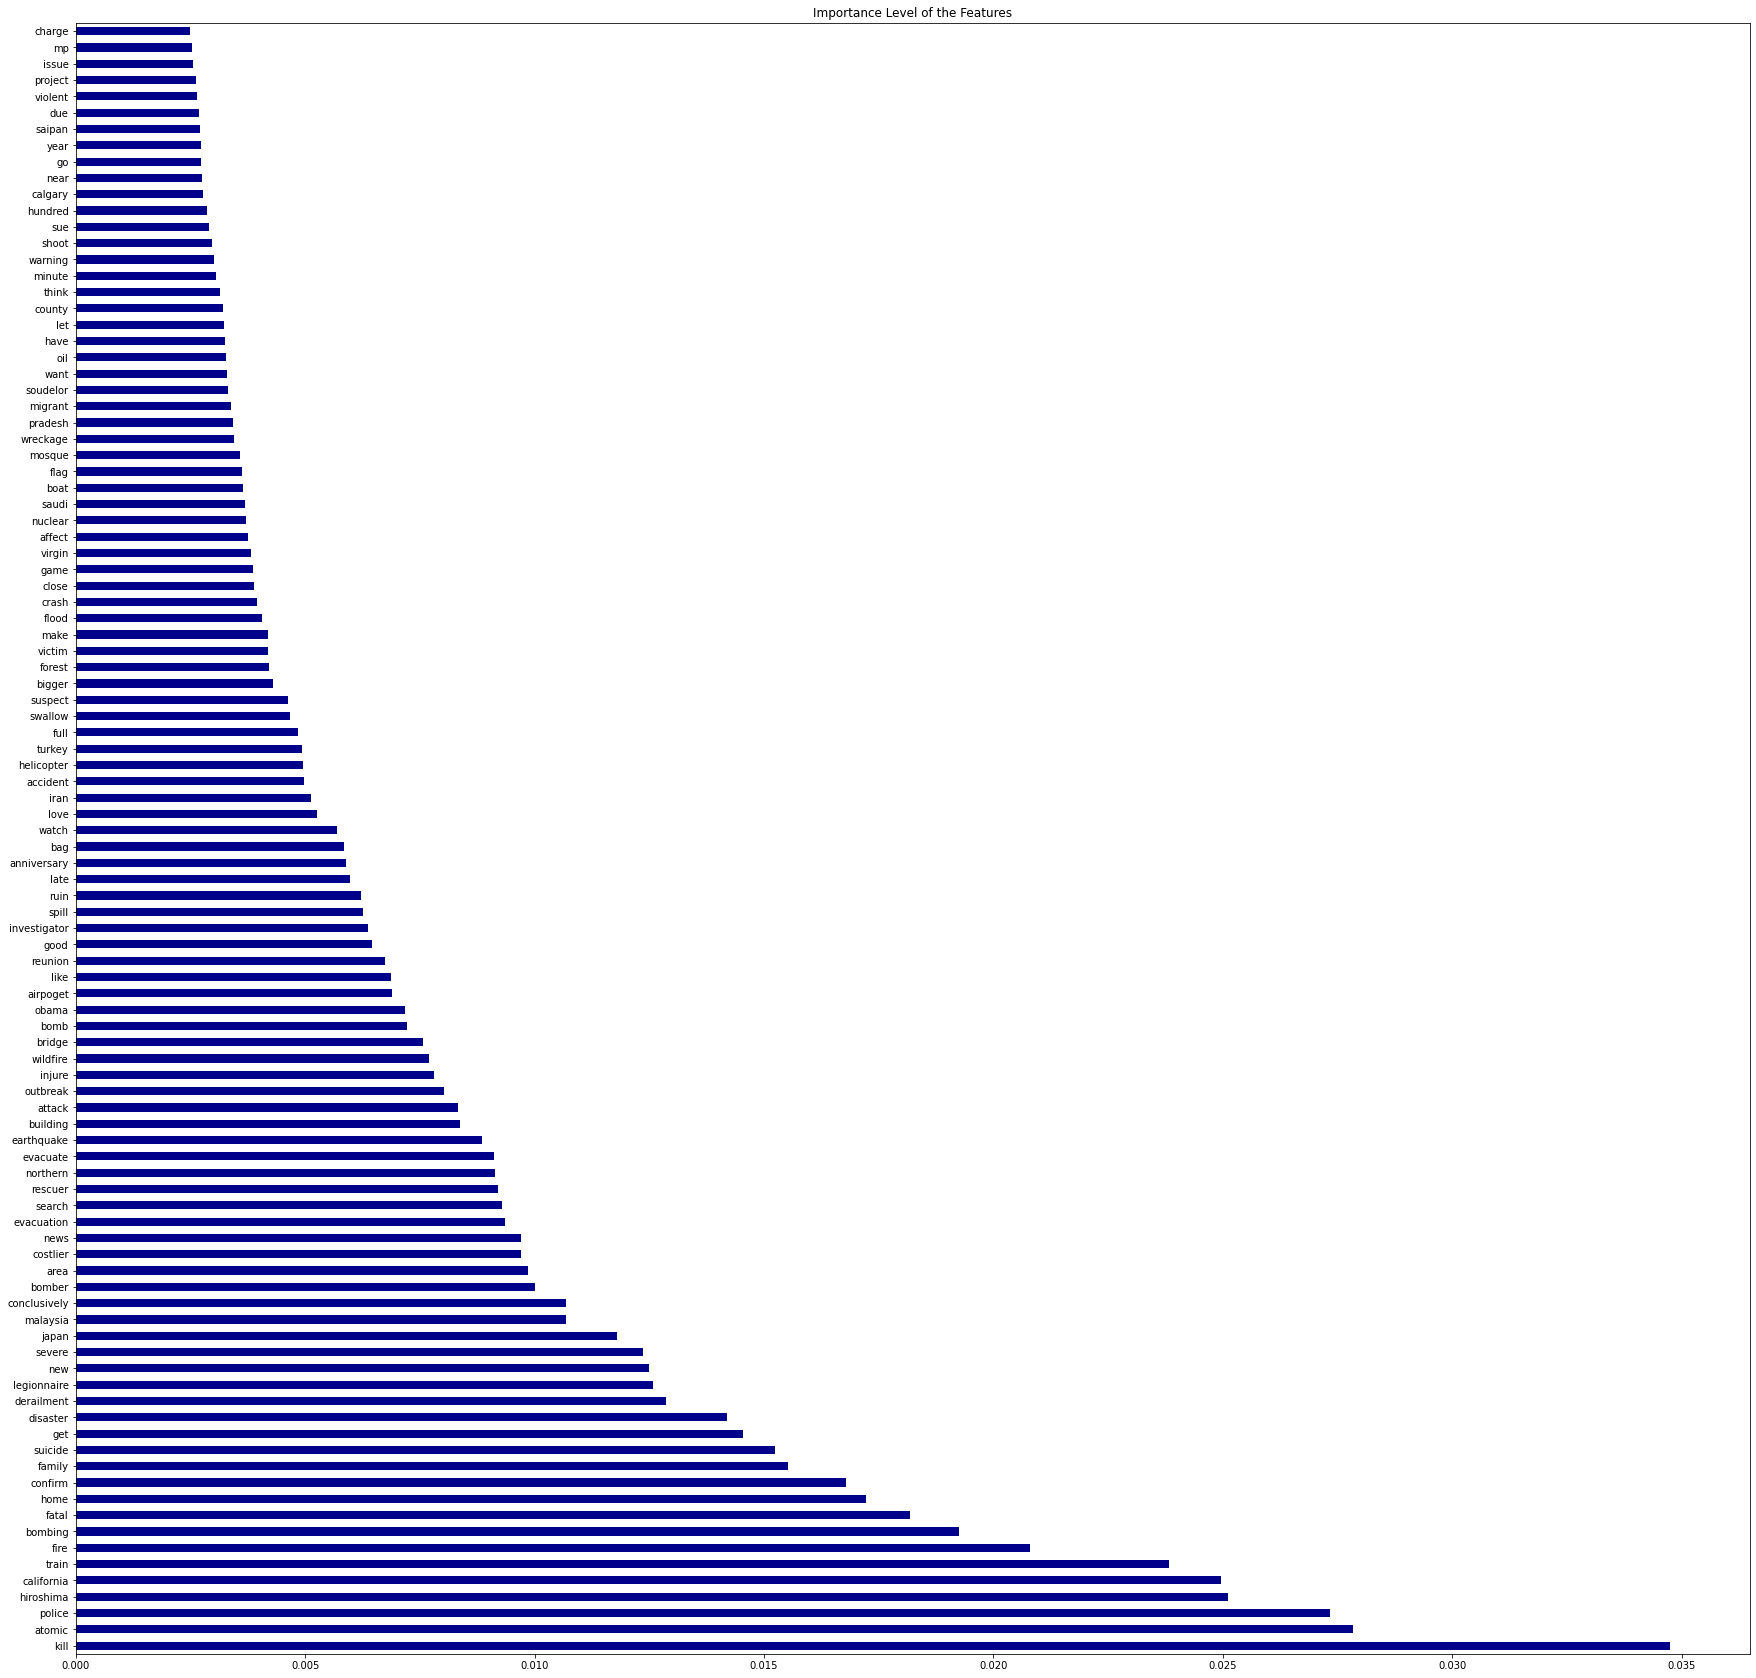

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
importance_level = pd.Series(data=my_model1.feature_importances_,
                        index= X1.columns)

importance_level_sorted = importance_level.sort_values(ascending=False)
plot_importance = importance_level_sorted[0:100]
plot_importance.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, y1_preds ))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       873
           1       0.99      0.27      0.42       650

    accuracy                           0.69      1523
   macro avg       0.82      0.63      0.60      1523
weighted avg       0.80      0.69      0.63      1523



#### Classification Report

In [76]:
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


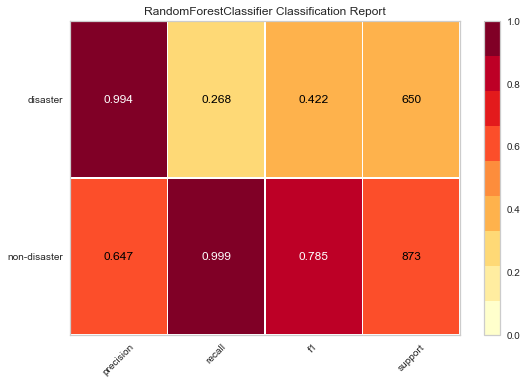

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [77]:
visualizer = ClassificationReport(my_model1, classes=['non-disaster', 'disaster'], support=True)

visualizer.fit(X1_train, y1_train)        # Fit the visualizer and the model
visualizer.score(X1_test, y1_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Confusion Matrix

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


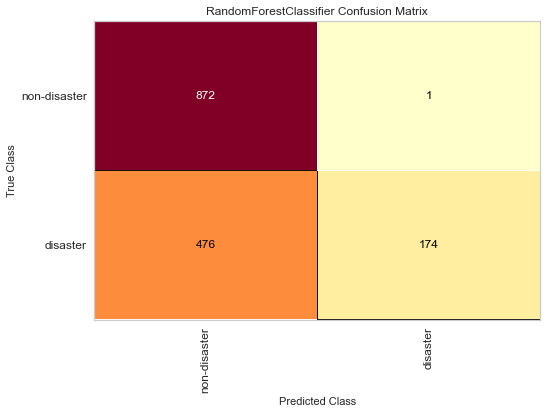

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(my_model1, classes=['non-disaster', 'disaster'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X1_train, y1_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X1_test, y1_test)

# How did we do?
cm.show()

#### Precision-Recall Curve

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


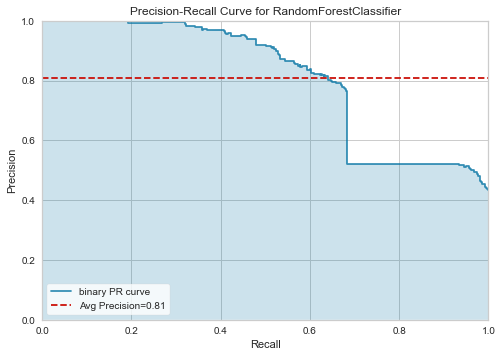

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [79]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(my_model1)
viz.fit(X1_train, y1_train)
viz.score(X1_test, y1_test)
viz.show()

### Random Forest Regression

In [62]:
data_reg = pd.read_csv('reg_model.csv')

In [63]:
data_reg = pd.read_csv('reg_model.csv')
data_reg = data_reg.drop(columns = ['Unnamed: 0', 'Country', 'Region', 'Year', 'Happ_Rank', 
                         'Family', 'Generosity', 'Trust_Gov', 'Dystopia', 'Winsorized_Dystopia', 'Target_Happ'], axis=1)
data_reg.head()

,Happ_Score,GDP,Life_Exp,Freedom,Winsorized_Family,Winsorized_Generosity,Winsorized_Trust_Gov
0,7.587,1.39651,0.94143,0.66557,1.34951,0.41978,0.29678
1,7.561,1.30232,0.94784,0.62877,1.40223,0.14145,0.43630
2,7.527,1.32548,0.87464,0.64938,1.36058,0.48357,0.34139
3,7.522,1.45900,0.88521,0.66973,1.33095,0.36503,0.34699
4,7.427,1.32629,0.90563,0.63297,1.32261,0.32957,0.45811


In [64]:
data_reg.columns = ['Happ_Score', 'GDP', 'Life_Exp', 'Freedom', 'Family', 'Generosity', 'Trust_Gov']
data_reg.head()

,Happ_Score,GDP,Life_Exp,Freedom,Family,Generosity,Trust_Gov
0,7.587,1.39651,0.94143,0.66557,1.34951,0.41978,0.29678
1,7.561,1.30232,0.94784,0.62877,1.40223,0.14145,0.43630
2,7.527,1.32548,0.87464,0.64938,1.36058,0.48357,0.34139
3,7.522,1.45900,0.88521,0.66973,1.33095,0.36503,0.34699
4,7.427,1.32629,0.90563,0.63297,1.32261,0.32957,0.45811


In [65]:
X2 = data_reg.iloc[:, 1:-1]
Y2 = data_reg.Happ_Score

In [66]:
random_forest_reg = RandomForestRegressor(random_state=2)


In [67]:
parameters2 = {'n_estimators':[25, 50, 75, 100],
              'criterion':["mse", "mae"],
              'max_depth': [3,5,7,9,11],
              'min_samples_split':[10, 20, 30, 40, 50]
             }

In [68]:

grid_cv2 = GridSearchCV(estimator=random_forest_reg,
                       param_grid = parameters2,
                       cv = 3, 
                      )

grid_cv2.fit(X2, Y2)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=2),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [25, 50, 75, 100]})

In [69]:
X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, Y2, test_size=0.20, random_state=111)

In [70]:
print("Best Parameters : ", grid_cv2.best_params_)
print("Best Score      : ", grid_cv2.best_score_)

Best Parameters :  {'criterion': 'mse', 'max_depth': 5, 'min_samples_split': 30, 'n_estimators': 25}
Best Score      :  0.7337906195242018


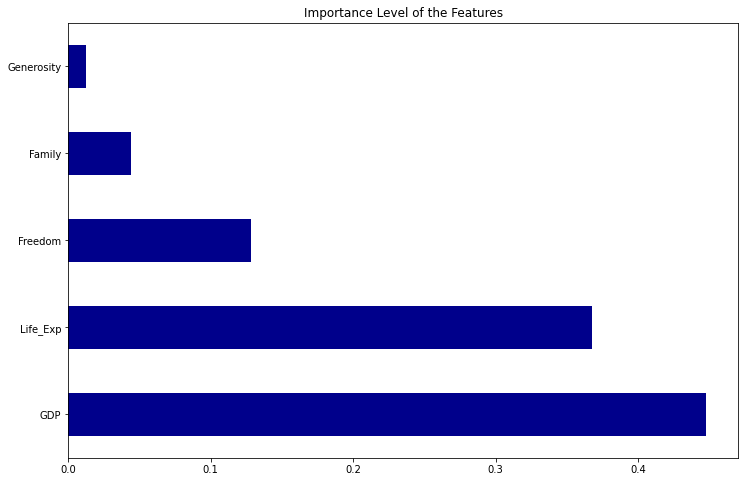

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
importance_level2 = pd.Series(data=my_model2.feature_importances_,
                        index= X2.columns)

importance_level_sorted2 = importance_level2.sort_values(ascending=False)
plot_importance2 = importance_level_sorted2[0:100]
plot_importance2.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error as MSE
my_model2 = grid_cv2.best_estimator_
y2_preds = my_model2.predict(X2_test)
rmse_test = MSE(y2_test, y2_preds)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 0.50


## Solution 2:

We bootstrap the data and use every piece for both training and testing. So, we use all the information in dataset to build our model. 

## Solution 3:

In [81]:
RandomForestClassifier()

RandomForestClassifier()

**n_estimators** = number of estimators (decision tree classifier)  
**criterion** = criteria to use for building decision tree  
**max_depth** = max number of split  
**min_samples_split** = minimum sample size to make a split  
    